# Technology focus: MERFISH
This notebook will present a rough overview of the plotting functionalities that `spatialdata` implements for MERFISH data.

## Loading the data
Please download the data from here: [MERFISH dataset](https://s3.embl.de/spatialdata/spatialdata-sandbox/merfish.zip) and adjust the variable containing the location of the `.zarr` file.

Information regarding data licensing and attribution for the dataset listed above is available at: https://github.com/scverse/spatialdata-notebooks/tree/main/datasets.

In [1]:
merfish_zarr_path = "./merfish.zarr"

In [2]:
import spatialdata as sd
import spatialdata_plot  # noqa: F401

merfish_sdata = sd.read_zarr(merfish_zarr_path)
merfish_sdata

/opt/miniconda3/envs/spatialdata-0.6.1/lib/python3.13/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/miniconda3/envs/spatialdata-0.6.1/lib/python3.13/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


SpatialData object, with associated Zarr store: /Users/macbook/embl/projects/basel/spatialdata-sandbox/merfish/data.zarr
├── Images
│     └── 'rasterized': DataArray[cyx] (1, 522, 575)
├── Points
│     └── 'single_molecule': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     ├── 'anatomical': GeoDataFrame shape: (6, 1) (2D shapes)
│     └── 'cells': GeoDataFrame shape: (2389, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2389, 268)
with coordinate systems:
    ▸ 'global', with elements:
        rasterized (Images), single_molecule (Points), anatomical (Shapes), cells (Shapes)

## Visualise the data
We're going to create a naiive visualisation of the data, overlaying the annotated anatomical regions contained in `anatomical` and the tissue image. For this, we need to load the `spatialdata_plot` library which extends the `sd.SpatialData` object with the `.pl` module. Furthermore, we will only select the elements we want to plot using `pp.get_elements()`.

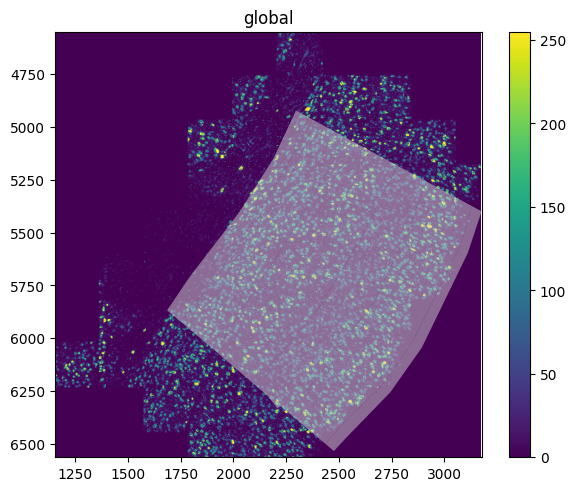

In [3]:
merfish_sdata.subset(["anatomical", "rasterized"]).pl.render_images().pl.render_shapes(
    fill_alpha=0.5, outline=True
).pl.show()

The MERFISH data also contains points which we have so far not visualised. This can be done with the `pl.render_points()` function. However, since we have over 3 million points, we will only render 1 % of them as to not overplot the image.

In [4]:
sampled_points = merfish_sdata.points["single_molecule"].sample(frac=0.01)
# fix attrs (see https://github.com/scverse/spatialdata/issues/1035)
sampled_points.attrs = merfish_sdata.points["single_molecule"].attrs
merfish_sdata.points["single_molecule"] = sampled_points

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/opt/miniconda3/envs/spatialdata-0.6.1/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  return fn(*args_all, **kw)
/opt/miniconda3/envs/spatialdata-0.6.1/lib/python3.13/functools.py:929: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


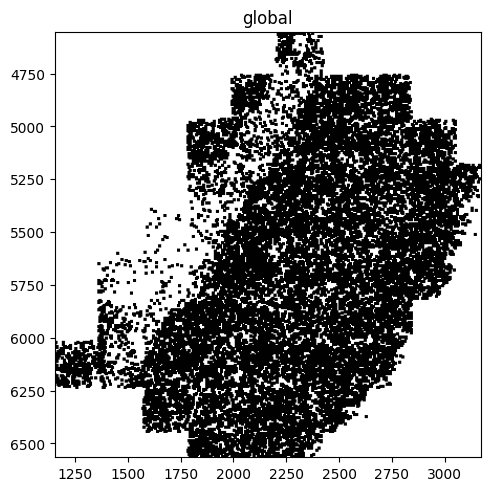

In [7]:
merfish_sdata.pl.render_points(color="black").pl.show()

Furthermore, we can overlay all 3 layers and color the points by an annotation.

INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/opt/miniconda3/envs/spatialdata-0.6.1/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  return fn(*args_all, **kw)
/opt/miniconda3/envs/spatialdata-0.6.1/lib/python3.13/functools.py:929: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/opt/miniconda3/envs/spatialdata-0.6.1/lib/python3.13/site-packages/spatialdata_plot/pl/utils.py:872: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)
/opt/miniconda3/envs/spatialdata-0.6.1/lib/python3.13/site-packages/dask/dataframe/core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting string to 

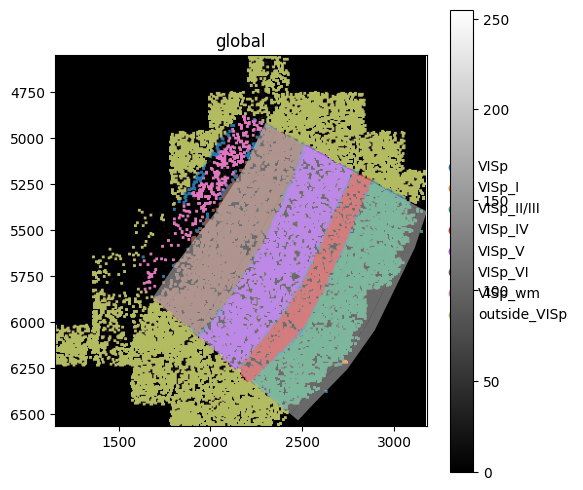

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, figsize=(6, 6))

(
    merfish_sdata.subset(["anatomical", "rasterized", "single_molecule"])
    .pl.render_images(cmap="gray")
    .pl.render_points(color="cell_type", size=1)
    .pl.render_shapes(fill_alpha=0.5, outline=True)
    .pl.show(ax=ax)
)